In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/covid19_region_20200421.csv', index_col='date', date_parser=dateparse, dtype='float')

/home/tatsuki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [23]:
ts = data['Kanto']

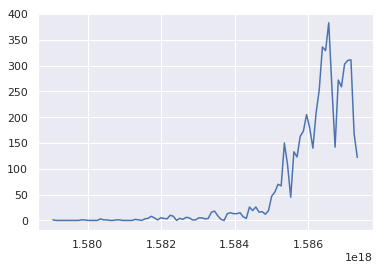

In [24]:
plt.plot(ts)

In [37]:
diff = ts.diff()
diff = diff.dropna()

In [38]:
params = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')

/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

In [39]:
print(params)

{'aic':             0           1           2
0         NaN  956.732900  954.541024
1  956.836896  955.588851  951.382442
2  957.149453  955.385935  951.592577
3  958.077557  956.202530  953.584342
4  954.219930  948.741375  948.214789, 'aic_min_order': (4, 2)}


In [40]:
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(ts, order=(4,1,2)).fit(dist=False)

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


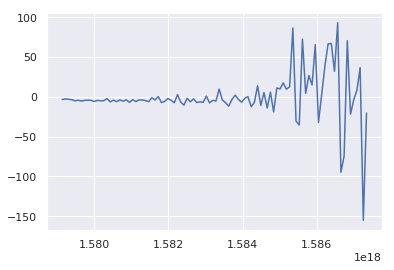

In [41]:
resid = arima_model.resid
plt.plot(resid)

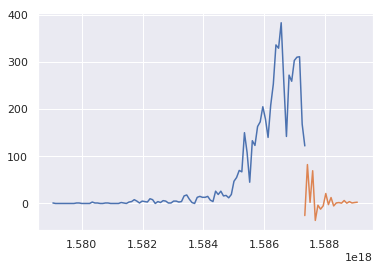

In [42]:
predict = arima_model.predict('2020-04-20', '2020-05-10')
plt.plot(ts) # 実データをプロット
plt.plot(predict) # 予測データをプロット

In [43]:
sarima_model = sm.tsa.SARIMAX(ts, order=(4,1,2), seasonal_order=(1,1,1,7)).fit()  # 1週間周期

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


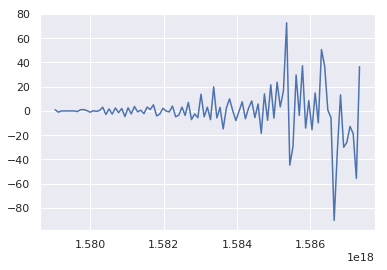

In [44]:
plt.plot(sarima_model.resid)

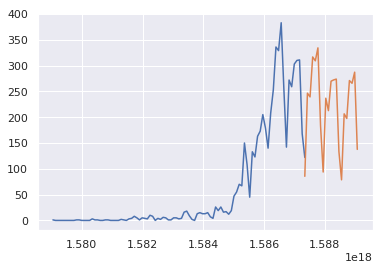

In [48]:
predict = sarima_model.predict('2020-04-20', '2020-05-10')
plt.plot(ts) # 実データをプロット
plt.plot(predict) # 予測データをプロット

In [46]:
print(predict)

2020-04-20     85.452505
2020-04-21    246.557622
2020-04-22    239.282584
2020-04-23    316.722914
2020-04-24    309.214012
2020-04-25    334.322667
2020-04-26    183.439063
2020-04-27     93.770138
2020-04-28    236.799209
2020-04-29    212.730416
2020-04-30    269.761703
2020-05-01    272.230859
2020-05-02    273.823254
2020-05-03    133.407365
2020-05-04     78.653159
2020-05-05    206.481612
2020-05-06    197.558496
2020-05-07    270.990034
2020-05-08    265.651577
2020-05-09    287.213268
2020-05-10    137.615264
Freq: D, dtype: float64
